In [6]:
import numpy as np
import pandas as pd
from utils import generate_random_sales

Data=pd.date_range(start='2025-01-01' , end= '2025-12-01',freq='MS')

product_A =generate_random_sales(50,100,12)
product_B =generate_random_sales(30,80,12)
product_C =generate_random_sales(20,60,12)
product_D =generate_random_sales(10,50,12)


dataFrame = pd.DataFrame({
    'DATA' : Data ,
    'Product_A' :  product_A ,
    'Product_B' :  product_B ,
    'Product_C' :  product_C ,
    'Product_D' :  product_D 

})

dataFrame.to_csv('data/initial.csv',index=False)


In [ ]:
dataFrame

,DATA,Product_A,Product_B,Product_C,Product_D
0,2025-01-01,69,33,58,19
1,2025-02-01,69,57,43,29
2,2025-03-01,77,56,35,21
3,2025-04-01,85,60,59,30
4,2025-05-01,68,37,28,47
5,2025-06-01,60,69,47,14
6,2025-07-01,83,70,48,12
7,2025-08-01,81,68,46,13
8,2025-09-01,74,54,35,14
9,2025-10-01,52,50,34,39


In [11]:
dataFrame['Total_sales'] = dataFrame[['Product_A' , 'Product_B' , 'Product_C' , 'Product_D']].sum(axis=1)

In [12]:
dataFrame['Total_sales']

0     186
1     220
2     192
3     198
4     235
5     204
6     209
7     242
8     182
9     193
10    150
11    198
Name: Total_sales, dtype: int64

In [13]:
dataFrame['Average_sales']=dataFrame[['Product_A' , 'Product_B' , 'Product_C' , 'Product_D']].mean(axis=1)
dataFrame['Average_sales']

0     46.50
1     55.00
2     48.00
3     49.50
4     58.75
5     51.00
6     52.25
7     60.50
8     45.50
9     48.25
10    37.50
11    49.50
Name: Average_sales, dtype: float64

In [14]:
dataFrame['Month_over_Month_Growth']=dataFrame['Total_sales'].pct_change()*100
dataFrame['Month_over_Month_Growth']

0           NaN
1     18.279570
2    -12.727273
3      3.125000
4     18.686869
5    -13.191489
6      2.450980
7     15.789474
8    -24.793388
9      6.043956
10   -22.279793
11    32.000000
Name: Month_over_Month_Growth, dtype: float64

In [ ]:
dataFrame['Month'] = pd.to_datetime(dataFrame['DATA']).dt.month
dataFrame['Quarter'] = pd.cut(
    dataFrame['Month'], 
    bins=[0,3,6,9,12], 
    labels=['Q1','Q2','Q3','Q4']
)

In [16]:
dataFrame

,DATA,Product_A,Product_B,Product_C,Product_D,Total_sales,Average_sales,Month_over_Month_Growth,Month,Quarter
0,2025-01-01,87,31,35,33,186,46.50,NaN,1,Q1
1,2025-02-01,98,49,56,17,220,55.00,18.279570,2,Q1
2,2025-03-01,70,58,29,35,192,48.00,-12.727273,3,Q1
3,2025-04-01,88,49,46,15,198,49.50,3.125000,4,Q2
4,2025-05-01,69,75,48,43,235,58.75,18.686869,5,Q2
5,2025-06-01,97,68,28,11,204,51.00,-13.191489,6,Q2
6,2025-07-01,78,69,33,29,209,52.25,2.450980,7,Q3
7,2025-08-01,99,61,40,42,242,60.50,15.789474,8,Q3
8,2025-09-01,50,69,52,11,182,45.50,-24.793388,9,Q3
9,2025-10-01,51,40,57,45,193,48.25,6.043956,10,Q4


In [18]:
dataFrame['Max_Sales_Product']=dataFrame[['Product_A' , 'Product_B','Product_C' , 'Product_D']].idxmax(axis=1)
dataFrame['Min_Sales_Product']=dataFrame[['Product_A' , 'Product_B','Product_C' , 'Product_D']].idxmin(axis=1)
dataFrame

,DATA,Product_A,Product_B,Product_C,Product_D,Total_sales,Average_sales,Month_over_Month_Growth,Month,Quarter,Max_Sales_Product,Min_Sales_Product
0,2025-01-01,87,31,35,33,186,46.50,NaN,1,Q1,Product_A,Product_B
1,2025-02-01,98,49,56,17,220,55.00,18.279570,2,Q1,Product_A,Product_D
2,2025-03-01,70,58,29,35,192,48.00,-12.727273,3,Q1,Product_A,Product_C
3,2025-04-01,88,49,46,15,198,49.50,3.125000,4,Q2,Product_A,Product_D
4,2025-05-01,69,75,48,43,235,58.75,18.686869,5,Q2,Product_B,Product_D
5,2025-06-01,97,68,28,11,204,51.00,-13.191489,6,Q2,Product_A,Product_D
6,2025-07-01,78,69,33,29,209,52.25,2.450980,7,Q3,Product_A,Product_D
7,2025-08-01,99,61,40,42,242,60.50,15.789474,8,Q3,Product_A,Product_C
8,2025-09-01,50,69,52,11,182,45.50,-24.793388,9,Q3,Product_B,Product_D
9,2025-10-01,51,40,57,45,193,48.25,6.043956,10,Q4,Product_C,Product_B


In [19]:
dataFrame.to_csv('data/final.csv',index=False)

In [22]:
pivot_avg = dataFrame.pivot_table(
    index='Quarter',
    values=['Product_A','Product_B','Product_C','Product_D','Total_sales'],
    aggfunc='mean'
)

pivot_avg

C:\Users\PC\AppData\Local\Temp\ipykernel_14500\586962602.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_avg = dataFrame.pivot_table(


,Product_A,Product_B,Product_C,Product_D,Total_sales
Quarter,,,,,
Q1,85.000000,46.000000,40.000000,28.333333,199.333333
Q2,84.666667,64.000000,40.666667,23.000000,212.333333
Q3,75.666667,66.333333,41.666667,27.333333,211.000000
Q4,71.333333,35.666667,43.333333,30.000000,180.333333


In [44]:
pivot_total=dataFrame.pivot_table(
     index='Quarter',
    values=['Total_sales'],
    aggfunc='sum'
)
pivot_total

C:\Users\PC\AppData\Local\Temp\ipykernel_14500\2080100924.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_total=dataFrame.pivot_table(


,Total_sales
Quarter,
Q1,598
Q2,637
Q3,633
Q4,541


In [24]:
dataFrame

,DATA,Product_A,Product_B,Product_C,Product_D,Total_sales,Average_sales,Month_over_Month_Growth,Month,Quarter,Max_Sales_Product,Min_Sales_Product
0,2025-01-01,87,31,35,33,186,46.50,NaN,1,Q1,Product_A,Product_B
1,2025-02-01,98,49,56,17,220,55.00,18.279570,2,Q1,Product_A,Product_D
2,2025-03-01,70,58,29,35,192,48.00,-12.727273,3,Q1,Product_A,Product_C
3,2025-04-01,88,49,46,15,198,49.50,3.125000,4,Q2,Product_A,Product_D
4,2025-05-01,69,75,48,43,235,58.75,18.686869,5,Q2,Product_B,Product_D
5,2025-06-01,97,68,28,11,204,51.00,-13.191489,6,Q2,Product_A,Product_D
6,2025-07-01,78,69,33,29,209,52.25,2.450980,7,Q3,Product_A,Product_D
7,2025-08-01,99,61,40,42,242,60.50,15.789474,8,Q3,Product_A,Product_C
8,2025-09-01,50,69,52,11,182,45.50,-24.793388,9,Q3,Product_B,Product_D
9,2025-10-01,51,40,57,45,193,48.25,6.043956,10,Q4,Product_C,Product_B


In [27]:
with open('data/output.csv', 'w') as f:
    f.write('Average Sales per Quarter\n\n')
    pivot_avg.to_csv(f)
    f.write('\nTotal Sales per Quarter\n\n')
    pivot_total.to_csv(f)


In [ ]:
best_month_index=dataFrame['Total_sales'].idxmax()
best_month_index

dataFrame.loc[best_month_index ,'DATA']

7

In [42]:
product_totals = dataFrame[['Product_A', 'Product_B', 'Product_C', 'Product_D']].sum()

best_product = product_totals.idxmax()
best_product_sales = product_totals.max()

print(best_product, best_product_sales)


Product_A 950


In [ ]:
best_quarter = pivot_total['Total_sales'].idxmax()
best_quarter

'Q2'

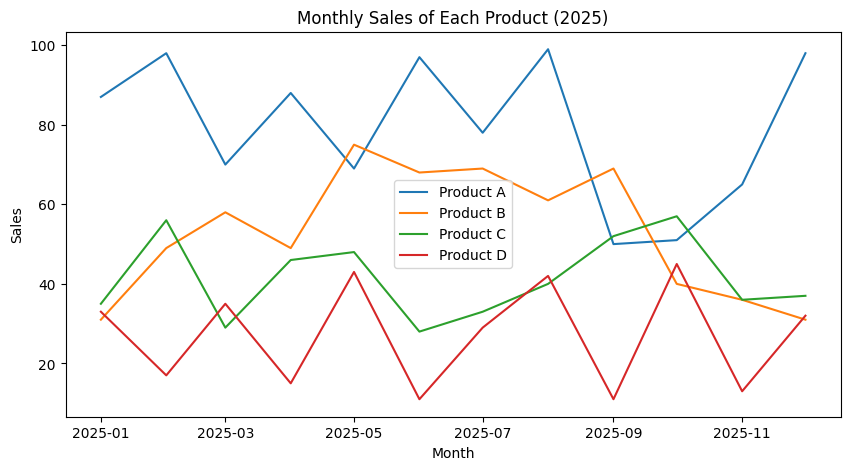

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))  # create the figure first

sns.lineplot(data=dataFrame, x='DATA', y='Product_A', label='Product A')
sns.lineplot(data=dataFrame, x='DATA', y='Product_B', label='Product B')
sns.lineplot(data=dataFrame, x='DATA', y='Product_C', label='Product C')
sns.lineplot(data=dataFrame, x='DATA', y='Product_D', label='Product D')

plt.title("Monthly Sales of Each Product (2025)")  # add the title after plotting
plt.xlabel("Month")
plt.ylabel("Sales")
plt.legend()
plt.show()


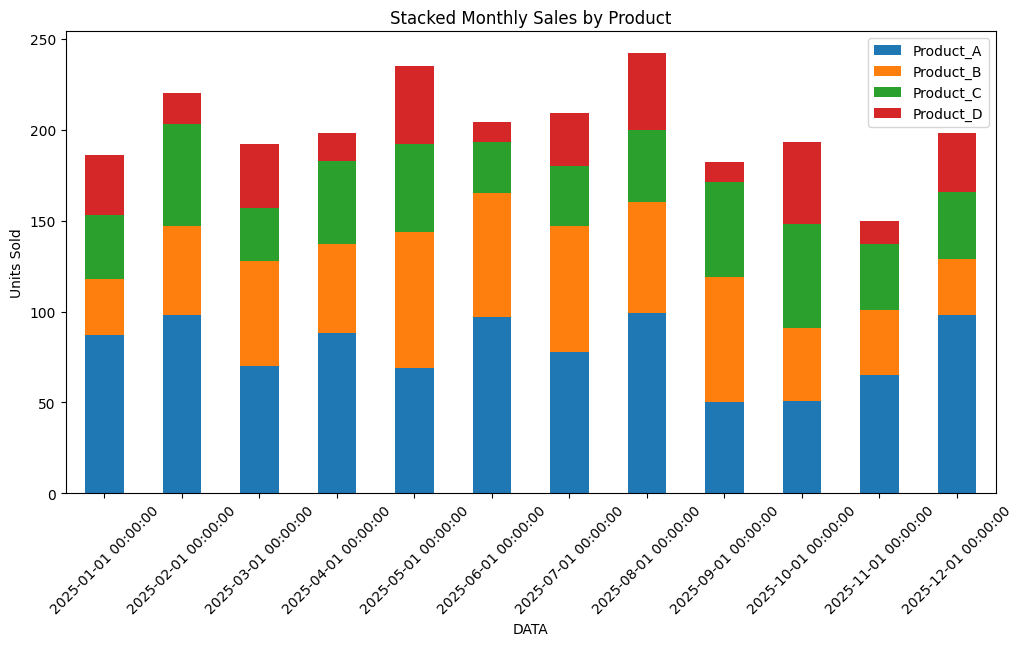

In [65]:
import matplotlib.pyplot as plt

# Select product columns
products = ['Product_A', 'Product_B', 'Product_C', 'Product_D']

# Plot stacked bar chart
dataFrame.plot(x='DATA', y=products, kind='bar', stacked=True, figsize=(12,6))


plt.title('Stacked Monthly Sales by Product')
plt.ylabel('Units Sold')
plt.xticks(rotation=45)
plt.show()


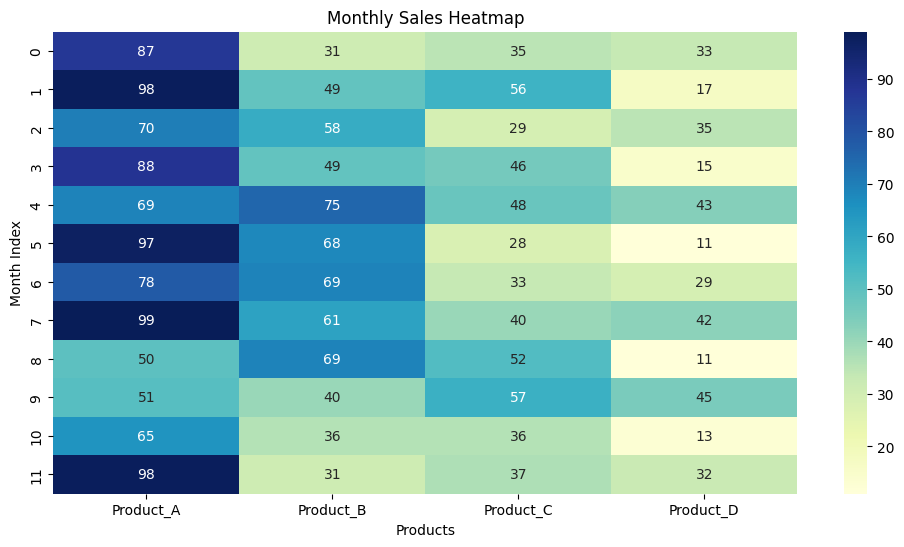

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.heatmap(dataFrame[['Product_A','Product_B','Product_C','Product_D']],
            annot=True, fmt="d", cmap="YlGnBu")
plt.title('Monthly Sales Heatmap')
plt.xlabel('Products')
plt.ylabel('Month Index')
plt.show()


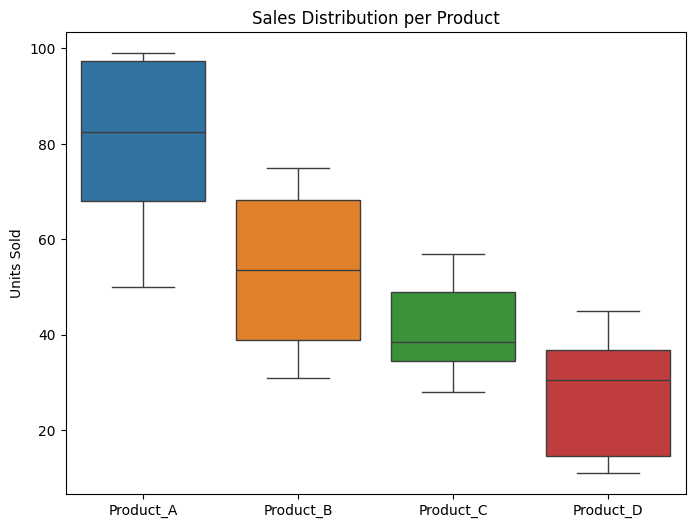

In [67]:
plt.figure(figsize=(8,6))
sns.boxplot(data=dataFrame[['Product_A','Product_B','Product_C','Product_D']])
plt.title('Sales Distribution per Product')
plt.ylabel('Units Sold')
plt.show()
